## Dataset: Swedish texts published during 2021 about *COVID-19*

## Zipf's Law and Relative vs Absolute frequency (at the end of this notebook)
In 1935, linguist [*George Kingsley Zipf*](https://en.wikipedia.org/wiki/George_Kingsley_Zipf) observed that in any big text, the nth most frequent word appears with a frequency of roughly 1/n of the most frequent word;i.e., the most common word occurs approximately twice as often as the next common one, three times as often as the third most common, and so on. If we plot the frequency of words, most common first, on a log-log plot (<i>a two-dimensional graph of numerical data that uses logarithmic scales on both the horizontal and vertical axes</i>), they should come out as a straight line if Zipf's Law holds. Here we see that it is a fairly close fit:
### Zipf's law / distribution.

**Import primary libraries** and
**download the _.csv_ file with the dataset**.

In [19]:
import pandas as pd
from io import StringIO
import requests
import matplotlib.pyplot as plt
from collections import Counter
import re

# A function to dowload a .csv file which contains the dataset
def download_and_inspect_csv(url, row_index):
    # Download the CSV file and read it into a DataFrame
    df = pd.read_csv(StringIO(requests.get(url).text), sep="\t")

    # Convert the 'date' column to datetime format directly (if not)
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Print information about the dataset
    print('\nFile downloaded and saved!')
    print(f"The dataset consists of a total of {len(df)} posts.\n")
    df.info()
    print(f'\nThe {row_index}th text post/content/line of the dataset:')
    print(df["text"].iloc[row_index])
    print("\n*************Category distribution of the genres*************")
    print(f"Category distribution:\n{df['genre'].value_counts()}\n")
    return df # Return the dataframe

#load_csv_from_url("https://raw.githubusercontent.com/DimitrisKokkinakis/swedish-notebooks/refs/heads/main/textual-resources/sv_CovidCorpus2.csv")
df=download_and_inspect_csv("https://raw.githubusercontent.com/DimitrisKokkinakis/swedish-notebooks/refs/heads/main/textual-resources/sv_CovidCorpus2.csv", 1000)


File downloaded and saved!
The dataset consists of a total of 2729 posts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      2729 non-null   int64         
 1   date    2729 non-null   datetime64[ns]
 2   genre   2729 non-null   object        
 3   text    2729 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 85.4+ KB

The 1000th text post/content/line of the dataset:
Elva fall av den indiska dubbelmutationen har upptäckts i Danmark. Foto: TT Elva fall av den så_kallade indiska varianten av covid_19 har upptäckts i Danmark, rapporterar danska TV2. Fallen hittades redan i mars. De smittade känner varandra och har någon form av koppling till de länder där varianten har varit mer utbredd. - Så det handlar inte om elva olika smittokedjor, och det lugnar oss. Det hade inte varit så bra, säger Ander

In [20]:
#Copy just the text column from the .csv
TEXT = df["text"]

In [21]:
# import List from the typing module
from typing import List
import re

def tokens(text) -> List[str]:
    """List all the word tokens in a text. Normalize to lowercase."""
    if isinstance(text, str): # Check if text is a string
        return re.findall('[a-zåäöéè]+', text.lower())
    else:
        return [] # Return an empty list if text is not a string

sentence = ' '.join

In [22]:
WORDS = []
for text in TEXT: # Iterate over each text in the Series
    WORDS.extend(tokens(text)) # Extend the WORDS list with the tokens from each text

In [23]:
#Example of occurrences of a token/word, eg 'att'
print(f"For instance, the number of times 'att' (eng. 'to') occurs in this dataset\n is: {WORDS.count('att')} times.\n")

For instance, the number of times 'att' (eng. 'to') occurs in this dataset
 is: 22187 times.



In [24]:
from collections import Counter

def analyze_word_bag(words):
    """Analyzes a list of words by calculating the total count and unique token count."""
    # Print the total number of tokens
    print(f"The dataset consists of a total of {len(words)} tokens.")
    # Define the Bag class
    class Bag(Counter):
        """A bag of words."""
        pass # Add a pass statement to define the class without immediate execution
    # Instantiate the Bag class outside of its definition
    bag = Bag(words)
    # Print the number of unique tokens
    #print(f"The number of different tokens in the dataset is: {len(bag)}.\n")
    print(f"The number of different tokens in the dataset is: \033[1m{len(bag)}\033[0m.\n")

analyze_word_bag(WORDS)

The dataset consists of a total of 654252 tokens.
The number of different tokens in the dataset is: 34212.



The dataset consists of a total of 654252 tokens.
The number of different tokens in the dataset is: 34212.



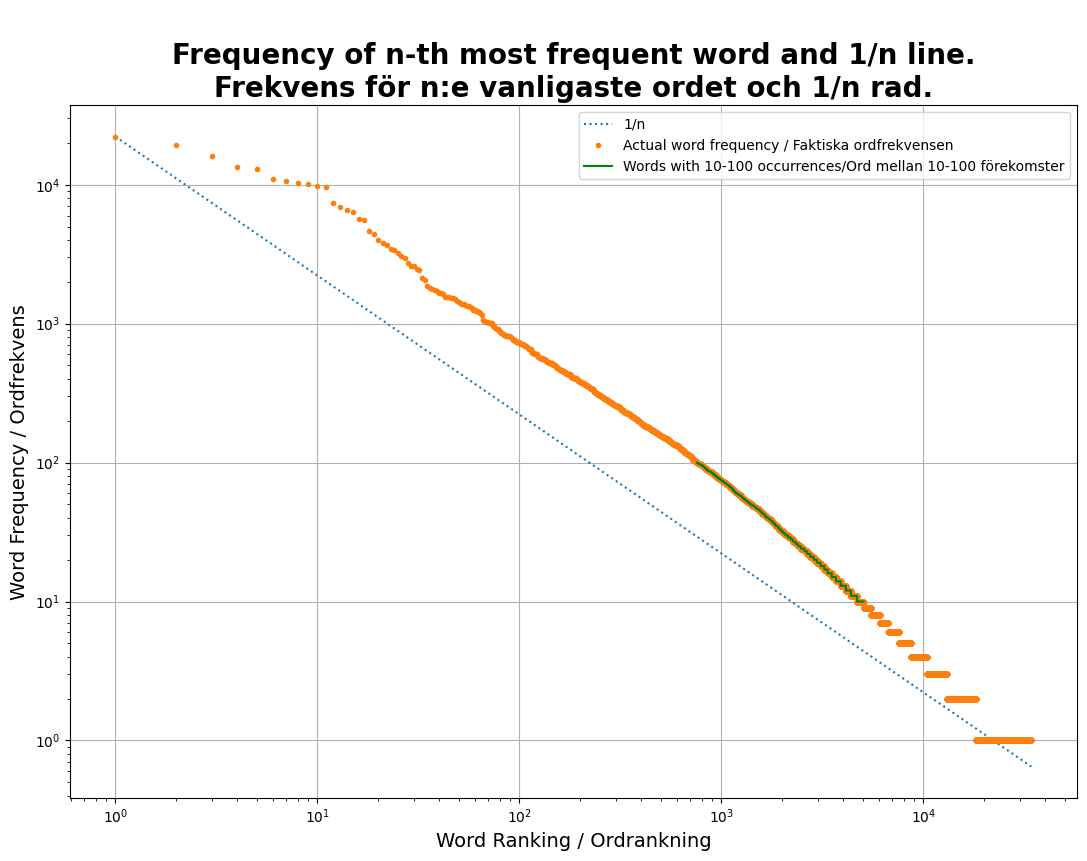

In [25]:
!pip install matplotlib # install matplotlib
import matplotlib.pyplot as plt # import the pyplot module from matplotlib

def zipf_plot(bag):
    # Maximum count for the most common word
    M = max(bag.values())
    X = range(1, len(bag) + 1)  # Ranking of words

    # Create the plot
    plt.figure(figsize=(13, 9))
    plt.yscale('log')
    plt.xscale('log')
    plt.title('\nFrequency of n-th most frequent word and 1/n line.\nFrekvens för n:e vanligaste ordet och 1/n rad.', fontsize=20, weight='bold')
    plt.xlabel('Word Ranking / Ordrankning', fontsize=14)
    plt.ylabel('Word Frequency / Ordfrekvens', fontsize=14)

    # Plot 1/n line (Zipf's law prediction)
    plt.plot(X, [M/i for i in X], ':', label='1/n')

    # Plot actual word frequency
    frequencies = [count for (word, count) in bag.most_common()]
    plt.plot(X, frequencies, '.', label='Actual word frequency / Faktiska ordfrekvensen')

    # Highlight words that occur between 10 and 100 times
    green_indices = [i+1 for i, count in enumerate(frequencies) if 10 <= count <= 100]
    green_freqs = [count for count in frequencies if 10 <= count <= 100]

    # Plot these words with green line markers
    plt.plot(green_indices, green_freqs, 'g-', label='Words with 10-100 occurrences/Ord mellan 10-100 förekomster')

    # Grid and legend
    plt.grid(True)
    plt.legend(loc=1)
    plt.show()

# Call analyze_word_bag to get the bag object, then pass it to zipf_plot
BAG = Counter(WORDS) # Define and instantiate bag outside of analyze_word_bag
analyze_word_bag(WORDS) # Call analyze_word_bag, but note that it doesn't return bag
zipf_plot(BAG) # Call zipf_plot with the bag object that was created




---



In [26]:
#Building the corpus
def build_corpus(text_col):
    """To build a text corpus by stitching all the records together. Input the text column"""
    corpus = ""
    for sent in text_col:
        if isinstance(sent, str):  # Check if 'sent' is a string
            corpus += sent
    return corpus

In [27]:
import string
import re
import pandas as pd

# Define the function to remove specific punctuation unless it's part of a word
def remove_specific_punctuation(text, exclude="-_"):
    if isinstance(text, str):
        # Define the regex pattern to match punctuation not embedded within a word
        pattern = rf'(?<!\w)[{re.escape(string.punctuation)}](?!\w)|(?<!\w)[{re.escape(string.punctuation)}](?=\w)|(?<=\w)[{re.escape(string.punctuation)}](?!\w)'

        # Replace all matching punctuation with an empty string, excluding the specified characters
        cleaned_text = re.sub(pattern, '', text)

        # Remove any excluded punctuation that isn’t part of a word
        for char in exclude:
            cleaned_text = re.sub(rf'(?<!\w){re.escape(char)}(?!\w)', '', cleaned_text)

        return cleaned_text
    else:
        return text  # Return the original value if it's not a string

# Apply the function to remove specific punctuation
df["text"] = df["text"].apply(remove_specific_punctuation)

# Convert to lowercase
df["text"] = df["text"].str.lower()

# Build the corpus
corpus = build_corpus(df['text'])

# Access the text content a specific element/post/document, e.g., at index 123
print(df["text"][123])

ändrade rekommendationer för testning av antikroppar mot covid_19 folkhälsomyndigheten har ändrat sina rekommendationer för antikroppstestning och har tagit beslutet att det inte längre är relevant på individnivå om det inte finns ett medicinskt syfte av den anledningen kommer region gotland från_och_med mars inte längre att erbjuda antikroppstestning för allmänheten eller för vård och omsorgspersonal läs mer om beslutet den februari startade region gotland möjlighet till antikroppstestning för alla som fyllt år och som är folkbokförda på gotland tider bokas via appen alltid öppet provtagningen utförs på labbet på visby lasarett på kvällstid säger linda eklund provtagningssamordnare i hälso och sjukvårdsförvaltningen avgift och kvalitet på test avgiften för antikroppstestning är kronor för personal som arbetar patientnära inom vård och omsorg är antikroppstestet kostnadsfritt testet som region gotland använder tas som ett blodprov i armvecket men alla som har haft covid_19 utvecklar in

In [28]:
corpus = df["text"].str.split()
#Observing the first few words of the rows/posts/documents
print(corpus[10:25])

10    [coronapanemin, har, pågått, i, nio, månader, ...
11    [47, procent, av, läkar, som, är, medlemmar, i...
12    [den, januari, kommer, riksdagen, att, rösta, ...
13    [det, är, nu, procent, fler, patienter, på, br...
14    [en, ny, brittisk, undersökning, visar, att, c...
15    [i, grand, county, i, colorado, registrerades,...
16    [nästan, alla, regioner, i, landet, är, drabba...
17    [vaccinsamordnare, richard_bergström, arkivbil...
18    [flera, regioner, diskuterar, nu, prioritering...
19    [läget, är, ansträngt, på, sjukhusens, avdelni...
20    [under, måndagen, uppdaterade, västra, götalan...
21    [hur, har, svenskar, skött, sitt, jul, och, ny...
22    [i, sviter, av, covid_19, har, ett, trettiotal...
23    [kaliforniens, hälso, och, sjukvårdspersonal, ...
24    [landets, regioner, och, kommuner, har, kommit...
Name: text, dtype: object


In [29]:
from nltk import FreqDist
fd=FreqDist() #Creating a FreqDist object

#Creating ranks and frequencies
ranks = []
freqs = []

# Flatten corpus into a single list of words, handling non-iterable elements
flat_corpus = [word for sublist in corpus if isinstance(sublist, list) for word in sublist]

for word in flat_corpus:  # Iterate over individual words
    fd[word] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.probability import FreqDist
import matplotlib.ticker as mticker

def plot_word_frequency(words, top_n=10):
    """Function to plot the word frequencies with improved visuals and color"""

    # Calculate word frequencies
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]

    # Create a DataFrame with the labels and counts
    df = pd.DataFrame({'Word': labels, 'Count': counts})

    # Set up the plot size and appearance
    plt.figure(figsize=(15, 5))
    plt.title("The 30 most Frequent Tokens in the Corpus (Including Stop Words)", fontsize=16, weight='bold')
    plt.ylabel("Count", fontsize=14)
    plt.xlabel("Token", fontsize=14)

    # Create the barplot with 'hue' assigned to avoid the deprecation warning
    plot = sns.barplot(x='Word', y='Count', hue='Word', data=df, palette="viridis", dodge=False, legend=False)

    # Improve the appearance
    plot.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
    plot.set_axisbelow(True)  # Ensure gridlines are below the bars
    plot.spines['top'].set_visible(False)  # Remove the top border
    plot.spines['right'].set_visible(False)  # Remove the right border

    # Rotate the x-axis labels for better readability
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right', fontsize=12)

    # Adjust the y-axis labels font size using ScalarFormatter to avoid the FixedFormatter warning
    plot.yaxis.set_major_formatter(mticker.ScalarFormatter())
    plot.tick_params(axis='y', labelsize=12)

    return plot

<ipython-input-30-0a6a0a0ba624>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right', fontsize=12)


<Axes: title={'center': 'The 30 most Frequent Tokens in the Corpus (Including Stop Words)'}, xlabel='Token', ylabel='Count'>

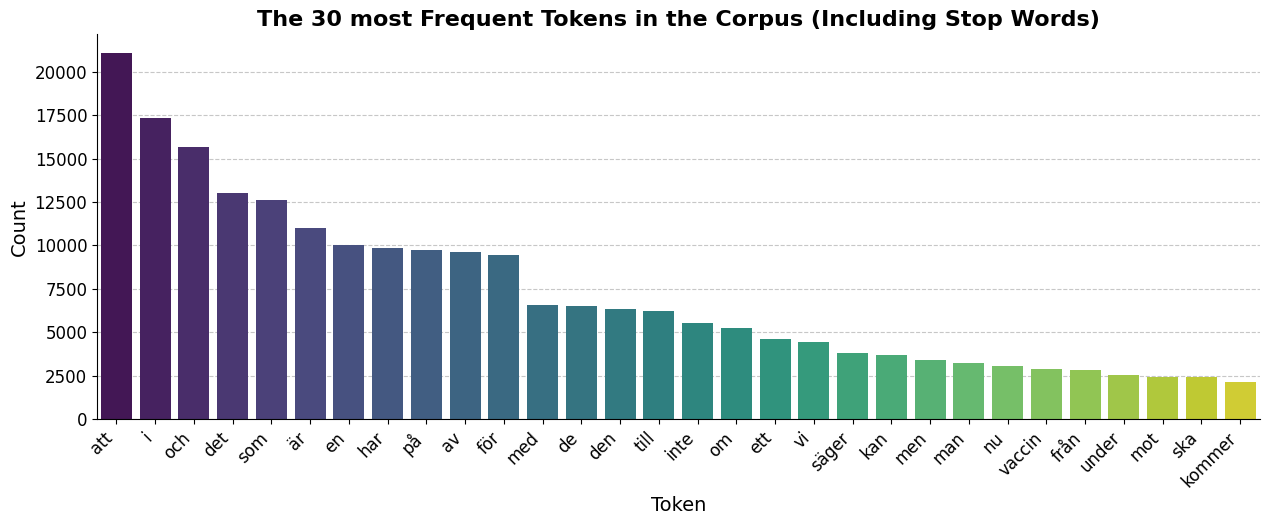

In [31]:
plot_word_frequency([word for sublist in corpus if isinstance(sublist, list) for word in sublist], 30)



---


### A relative frequency describes the number of times a particular value for a variable (data item) has been observed to occur in relation to the total number of values for that variable. The relative frequency is calculated by dividing the absolute frequency by the total number of values for the variable.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import requests
from io import StringIO

# Step 1: Load the CSV file from a URL
def load_csv_from_url(url):
    """
    Load the CSV file from the given URL and return a pandas DataFrame.
    """
    print('\nFile downloading and saving...\n')
    s = requests.get(url).text
    df = pd.read_csv(StringIO(s), sep="\t", parse_dates=['date'])
    print('File downloaded and saved!\n')
    return df

In [33]:
# Step 2: Filter data by month and count word frequencies
def filter_data_by_month(df, words, months):
    """
    Filter the DataFrame by the given months and count the frequency of words in each month.
    """
    word_freq_per_month = {month: Counter() for month in months}

    for month in months:
        # Filter for the current month
        monthly_data = df[df['date'].dt.month == month]
        # Convert all values in 'text' column to strings
        monthly_data['text'] = monthly_data['text'].astype(str)
        text_data = " ".join(monthly_data['text'].tolist()).lower()  # Combine all text into one string

        # Count the occurrences of each word
        for word in words:
            count = len(re.findall(rf'\b{word.lower()}\b', text_data))  # Use regex for exact word matching
            word_freq_per_month[month][word] = count

    return word_freq_per_month

In [34]:
# Step 3: Plot the word frequencies (absolute and relative)
def plot_word_frequencies(word_freq_per_month, words):
    """
    Plot absolute and relative frequencies of words over time (months).
    """
    months = list(word_freq_per_month.keys())
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Prepare data for plotting
    absolute_frequencies = {word: [word_freq_per_month[month][word] for month in months] for word in words}

    # Plot absolute frequencies
    plt.figure(figsize=(9, 5))
    for word in words:
        plt.plot(months, absolute_frequencies[word], label=f'{word} (absolute)')
    plt.xticks(months, month_labels)  # Use month names for x-axis labels
    plt.xlabel('Month of 2021')
    plt.ylabel('Absolute Frequency')
    plt.title('Absolute Frequency of Words over the Months of 2021')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute total word count for each month (for relative frequency)
    total_words_per_month = {month: sum(counter.values()) for month, counter in word_freq_per_month.items()}

    # Prepare data for relative frequencies
    relative_frequencies = {
        word: [
            (word_freq_per_month[month][word] / total_words_per_month[month]) * 100 if total_words_per_month[month] > 0 else 0
            for month in months
        ] for word in words
    }

    # Plot relative frequencies
    plt.figure(figsize=(10, 6))
    for word in words:
        plt.plot(months, relative_frequencies[word], label=f'{word} (relative)')
    plt.xticks(months, month_labels)
    plt.xlabel('Month of 2021')
    plt.ylabel('Relative Frequency (%)')
    plt.title('Relative Frequency of Words over the Months of 2021')
    plt.legend()
    plt.grid(True)
    plt.show()

In [35]:
# Main function to run the analysis
def main(url, words):
    # Load data from URL
    df = load_csv_from_url(url)

    # Filter for months 1-12 (January to December)
    months = list(range(1, 13))

    # Get word frequencies per month
    word_freq_per_month = filter_data_by_month(df, words, months)

    # Plot the results
    plot_word_frequencies(word_freq_per_month, words)


File downloading and saving...

File downloaded and saved!



<ipython-input-33-2062b3364e02>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data['text'] = monthly_data['text'].astype(str)
<ipython-input-33-2062b3364e02>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data['text'] = monthly_data['text'].astype(str)
<ipython-input-33-2062b3364e02>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

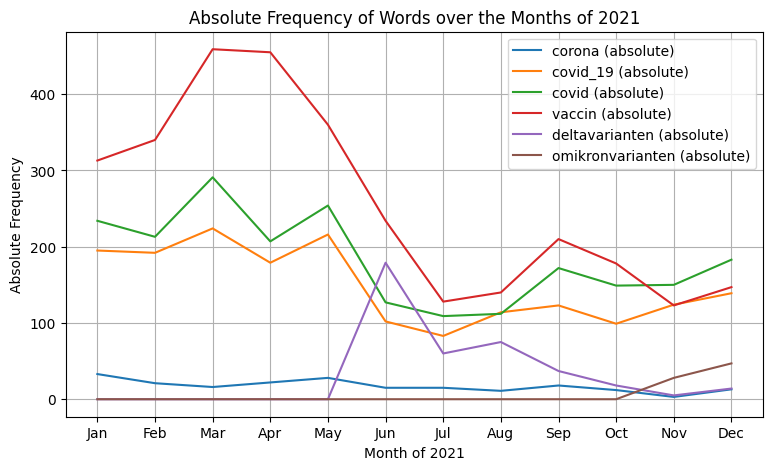

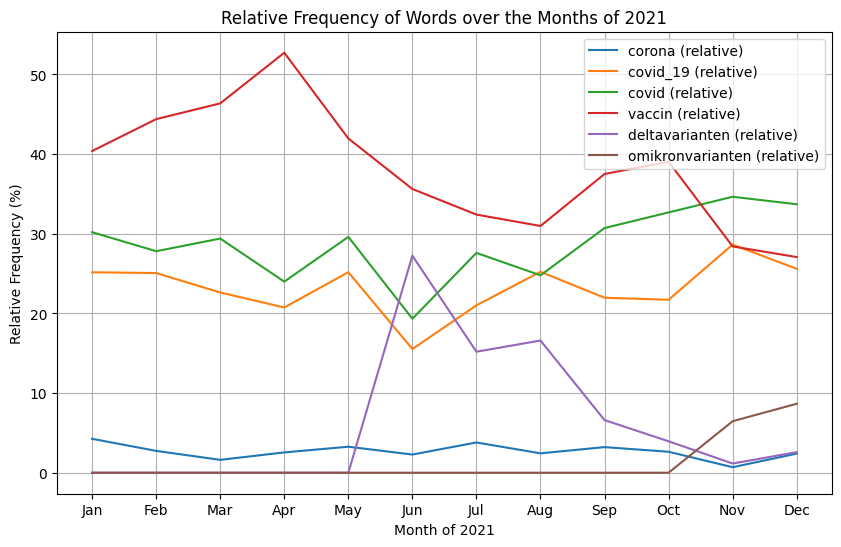

In [36]:
url = "https://raw.githubusercontent.com/DimitrisKokkinakis/swedish-notebooks/refs/heads/main/textual-resources/sv_CovidCorpus2.csv"

# Example usage - Replace with actual words:
words = ['corona', 'covid_19', 'covid', 'vaccin','deltavarianten','omikronvarianten']
main(url, words)

### Acknowledgments and/or other similar notebooks:

##### https://www.kaggle.com/code/vishynair/zipf-s-law-validation-with-word-frequency